<a href="https://colab.research.google.com/github/estebanvz/deep_learning_series_temporales/blob/aula-2/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# Dataset

In [ ]:
df_pasajeros = pd.read_csv("/content/alura-pasajeros.csv")
df_pasajeros.head()

,tiempo,pasajeros
0,2010.000000,112
1,2010.083333,118
2,2010.166667,132
3,2010.250000,129
4,2010.333333,121


In [ ]:
df_pasajeros.tail()

,tiempo,pasajeros
139,2021.583333,606
140,2021.666667,508
141,2021.750000,461
142,2021.833333,390
143,2021.916667,432


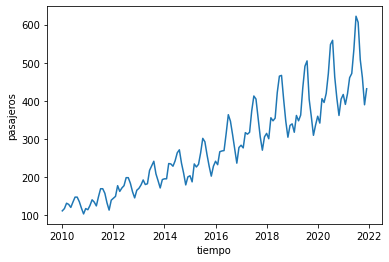

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros")

In [ ]:
ss = StandardScaler()
dfn_pasajeros=ss.fit_transform(df_pasajeros)

In [ ]:
dfn_pasajeros[:5,:]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593]])

In [ ]:
dfn_pasajeros[-5:,:]

array([[1.62383679, 2.72441656],
       [1.64789363, 1.9046693 ],
       [1.67195047, 1.5115252 ],
       [1.69600731, 0.91762667],
       [1.72006415, 1.26894693]])

In [ ]:
x = dfn_pasajeros[:,0]
y = dfn_pasajeros[:,1]

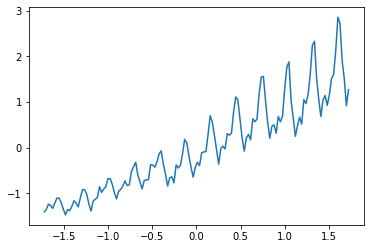

In [ ]:
sns.lineplot(x = x, y =y)

In [ ]:
split_n = int(0.9*len(x))
x_train = x[0:split_n]
x_test = x[split_n:]
y_train = y[0:split_n]
y_test = y[split_n:]
x_train.shape, y_test.shape

((129,), (15,))

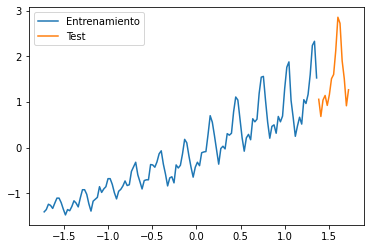

In [ ]:
sns.lineplot(x = x_train, y =y_train, label="Entrenamiento")
sns.lineplot(x = x_test, y =y_test, label="Test")

# Red Neuronal

In [ ]:
rn_lineal = Sequential()
rn_lineal.add( Dense(1, input_dim = 1, kernel_initializer = "ones", use_bias=True) )
rn_lineal.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
rn_lineal.fit(x_train,y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.1284


In [ ]:
y_predicted = rn_lineal.predict(x_train)
y_predicted.shape

(129, 1)

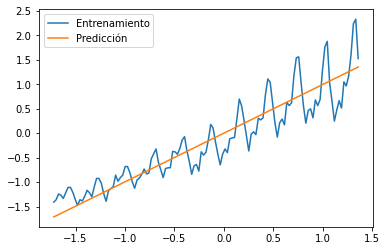

In [ ]:
sns.lineplot(x = x_train, y =y_train, label="Entrenamiento")
sns.lineplot(x = x_train, y =y_predicted.ravel(), label="Predicción")

In [ ]:
y_predicted_test = rn_lineal.predict(x_test)
y_predicted_test.shape

(15, 1)

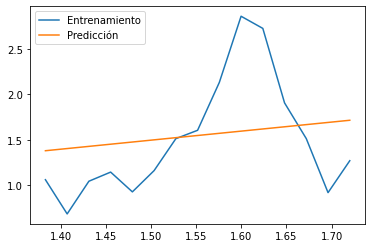

In [ ]:
sns.lineplot(x = x_test, y =y_test, label="Entrenamiento")
sns.lineplot(x = x_test, y =y_predicted_test.ravel(), label="Predicción")

## Transformación de datos

In [ ]:
def invertir_scala(tiempo,pasajeros,escalador):
  tmp = {"tiempo":tiempo,"pasajeros":pasajeros}
  df_tmp = pd.DataFrame(data=tmp)
  data_invertida = escalador.inverse_transform(df_tmp)
  df_final = pd.DataFrame(data_invertida)
  df_final.columns=["tiempo","pasajeros"]
  return df_final

In [ ]:
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

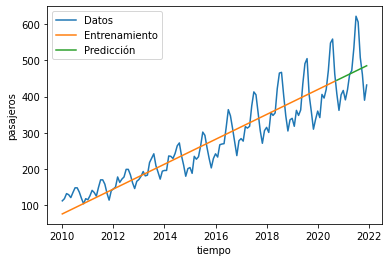

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

# Red Neuronal Compleja

In [ ]:
rn = Sequential()
rn.add( Dense(8, input_dim = 1) )
rn.add( Dense(8) )
rn.add( Dense(1) )
rn.compile(loss="mean_squared_error", optimizer="adam")
rn.fit(x_train,y_train, epochs=100)
y_predicted = rn.predict(x_train)
y_predicted_test = rn.predict(x_test)
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 1.1844
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0670
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9764
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8855
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8009
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7246
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6499
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5885
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5346
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4842
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4395
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3995
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

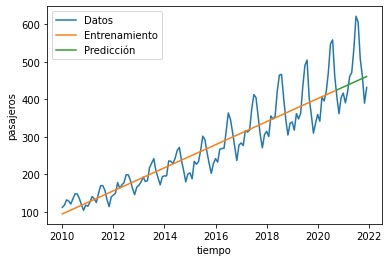

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

In [ ]:
rn_fa = Sequential()
rn_fa.add( Dense(8, input_dim = 1,activation="tanh") )
rn_fa.add( Dense(8,activation="tanh") )
rn_fa.add( Dense(1) )
rn_fa.compile(loss="mean_squared_error", optimizer="adam")
rn_fa.fit(x_train,y_train, epochs=100)
y_predicted = rn_fa.predict(x_train)
y_predicted_test = rn_fa.predict(x_test)
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 1.2859
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1547
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0409
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9339
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8339
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7398
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6577
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5875
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5287
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4743
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4279
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3849
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

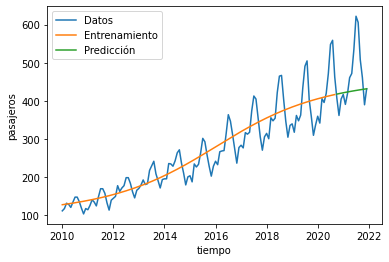

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")